In [1]:
import pandas as pd
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt

## Correlation
For numeric features

In [2]:
def pearson_corr(a, b):
    n = len(a)
    mean_a = a.mean()
    mean_b = b.mean()
    std_a = a.std()
    std_b = b.std()
    numerator = (a * b).sum() - (n * mean_a * mean_b)
    denominator = (n - 1) * std_a * std_b
    return numerator / denominator


def corr_matrix(mtrx):
    n = len(mtrx)
    means = mtrx.mean(axis=0)
    stds = mtrx.std(axis=0)
    mtrx_means = np.expand_dims(means, axis=1) @ np.expand_dims(means, axis=0)
    mtrx_stds = np.expand_dims(stds, axis=1) @ np.expand_dims(stds, axis=0)
    mtrx_mults = mtrx.T @ mtrx
    numerator = mtrx_mults - n * mtrx_means
    denominator = (n - 1) * mtrx_stds
    return numerator / denominator

### Correlation of 2 features

In [3]:
df = pd.read_csv('dataset/height-weight-sex-train.csv')
h_bound = (120, 200)
w_bound = (30, 120)
df = df[(df['Height'] > h_bound[0]) & (df['Height'] < h_bound[1])]
df = df[(df['Weight'] > w_bound[0]) & (df['Weight'] < w_bound[1])]
mtrx = df[['Height', 'Weight']].to_numpy()
print('r: {}'.format(pearson_corr(mtrx[:, 0], mtrx[:, 1])))

r: 0.283900597006703


### Correlation matrix of multiple features

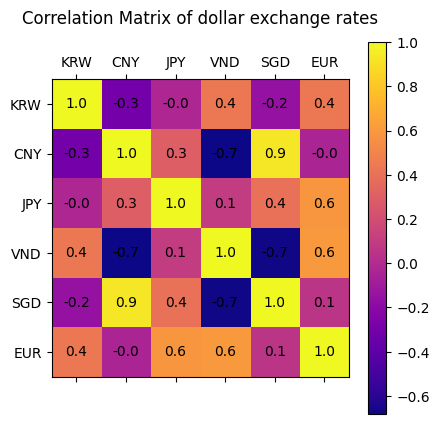

In [4]:
targets = ['KRW=X', 'CNY=X', 'JPY=X', 'VND=X', 'SGD=X', 'EUR=X']
df = pd.read_csv('./dataset/dollar_exchange_rates.csv')[['Date', *targets]]
ys = df[targets].dropna()
xs = df['Date'][1:]
model = make_interp_spline(ys.index, ys, k=5)
mtrx = model(xs.index)
index = list(map(lambda s: s.split('=')[0], targets))
df = pd.DataFrame(corr_matrix(mtrx), columns=index, index=index)

plt.matshow(df, cmap='plasma')
for (i, j), z in np.ndenumerate(df):
    plt.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plt.xticks(range(0, len(df.columns)), df.columns)
plt.yticks(range(0, len(df.index)), df.index)
plt.colorbar()
plt.title('Correlation Matrix of dollar exchange rates', pad=40)
plt.show()